Importing Neccessory Libraries

In [48]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
%matplotlib inline

Importing csv file and printing the head of t

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

Distribution of data

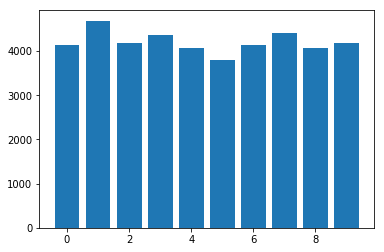

In [4]:
num_stats = defaultdict(int)

for num in data['label']:
    num_stats[num] += 1

x = sorted(num_stats)
y = [num_stats[num] for num in x]

plt.bar(x, height=y)
plt.xlabel = 'Image Content'
plt.ylabel = 'Frequency'
plt.title = 'Distribution of MNIST'
plt.show()

In [5]:
data.shape

(42000, 785)

Droping the not applicables.

In [6]:
data.dropna().shape

(42000, 785)

removing the labels from dataset.

In [7]:
result = data['label']
predictors = data.drop(['label'], axis=1)

Standardising the values

In [20]:
from sklearn.decomposition import PCA

X_std = StandardScaler().fit_transform(predictors.values)

pca = PCA(n_components=2)
x_2 = pca.fit(X_std).transform(X_std)

c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



K mean cluster from scratch
defined init method and selected 9 clusters, tol is tolerance, max_iter is our cycle.
Set a KMeans clustering with 9 components cuz there are 9 class labels

I have taken an empty dictionary which will be used for centroids and then I have used for loop I have assign a centroid. after start iterating using max_iter and I started with empty classification then calculate the distance of the features from our current centroid and classify them. 

In [54]:
class K_Means:
    def __init__(self, k=9, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self, data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self, data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification


After above process we will visualize our clusters using matplotlib

631.2652744358174
937.2656648692631
142.03717086846459
7.272318616432631
141.23072847712294
81.49525549953918
13.746014682260206
68.43742480603518
18.885115279653206
35.08572775896023
93.01803924452469
29.45866130211754
22.368502287992296
22.498095509054835
9.385387939960983
4.314703985972969
12.490944707055867
9.15591880872017
11.483537949411087
11.532251813271898
4.096796647932307
2.3221806846334285
2.5095953296798137
7.940116614393956
7.717135288262403
1.5161667350688592
3.133131327885808
5.720910383922344
6.4320036774538965
0.883640661947267
1.1631392780003325
4.237614498688805
4.711463491935076
0.29035541069298065
0.7922404653888842
3.4342054853201534
3.0651289605320984
0.25733457564312157
2.512651263146312
3.0725711713285757
2.374113336762287
0.8340529727870726
2.5875463447570253
1.7083182072596435
0.908418492048614
2.0556277985691813
0.09892687794006039
1.1126584552467385
0.805435691023002
0.5801467213964017
0.11014840628045247
1.3702065975378301
0.5369682100920278
1.14787125062

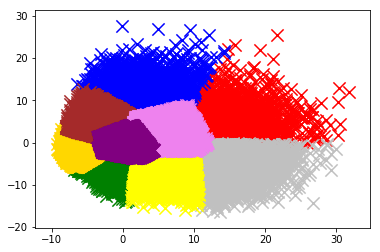

In [58]:
kmeans = K_Means()
kmeans.fit(x_2)
kmeans.predict(x_2)

colors = 10*["green","red","gold","blue","silver", "yellow", "brown", "violet", "purple"]

for centroid in kmeans.centroids:
    plt.scatter(kmeans.centroids[centroid][0], kmeans.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in kmeans.classifications:
    color = colors[classification]
    for featureset in kmeans.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

plt.show()


In [60]:
# with directly using Kmeans
# kmeans = KMeans(n_clusters=9)
# # Compute cluster centers and predict cluster indices
# kmeans_9 = kmeans.fit_predict(x_2)

# data = [
#     go.Scatter(
#         x= x_2[:, 0], 
#         y= x_2[:, 1], 
#         mode="markers",
#         showlegend=False,
#         marker=dict(
#             size=8,
#             color = kmeans_9,
#             colorscale = 'Rainbow',
#             showscale=False, 
#             line = dict(
#                 width = 2,
#                 color = 'rgb(255, 255, 255)'
#             )))]

# layout = go.Layout(
#     title= 'KMeans Clustering',
#     hovermode= 'closest',
#     xaxis= dict(
#          title= 'First Principal Component',
#         ticklen= 8,
#         zeroline= False,
#         gridwidth= 2,
#     ),
#     yaxis=dict(
#         title= 'Second Principal Component',
#         ticklen= 8,
#         gridwidth= 2,
#     ),
#     showlegend= True
# )

# fig = dict(data = data, layout = layout)
# py.iplot(fig, filename="kmeans_plot")